In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from imblearn.under_sampling import RandomUnderSampler




datos_corregidos = '/content/drive/MyDrive/CURSO_ALURA/Challenge_TelecomX_parte2/datos_corregidos.csv'

datos = pd.read_csv(datos_corregidos,index_col=False)

datos.reset_index(drop=True)

,Unnamed: 0,ID_cliente,Churn,Genero,Tercera_edad,Partner,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,...,Proteccion_del_dispositivo,Soporte_tecnico,Transmision_de_TV,Transmision_de_peliculas,Contrato,Facturacion_electronica,Metodo_de_pago,Cargos_mensuales,Cargos_totales,Cuentas_Diarias
0,0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7039,7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7040,7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7041,7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [105]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   7043 non-null   int64  
 1   ID_cliente                   7043 non-null   object 
 2   Churn                        7043 non-null   object 
 3   Genero                       7043 non-null   object 
 4   Tercera_edad                 7043 non-null   int64  
 5   Partner                      7043 non-null   object 
 6   Dependientes                 7043 non-null   object 
 7   Antiguedad                   7043 non-null   int64  
 8   Servicio_telefonico          7043 non-null   object 
 9   Lineas_multiples             7043 non-null   object 
 10  Servicio_de_internet         7043 non-null   object 
 11  Seguridad_en_linea           7043 non-null   object 
 12  Copia_de_seguridad_en_linea  7043 non-null   object 
 13  Proteccion_del_dis

In [106]:
datos = datos.drop(['Unnamed: 0', 'ID_cliente', 'Tercera_edad', 'Cuentas_Diarias'], axis=1)

In [107]:
datos

,Churn,Genero,Partner,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_de_internet,Seguridad_en_linea,Copia_de_seguridad_en_linea,Proteccion_del_dispositivo,Soporte_tecnico,Transmision_de_TV,Transmision_de_peliculas,Contrato,Facturacion_electronica,Metodo_de_pago,Cargos_mensuales,Cargos_totales
0,No,Female,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Yes,Male,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,No,Male,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,No,Male,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [108]:
datos["Churn"] = datos["Churn"].apply(lambda x: x.replace("No","0").replace("Yes","1"))

In [109]:
datos = datos.apply(lambda x: x.replace("No",False).replace("Yes",True).replace("No phone service",False).replace("Female",0).replace("Male",1))

/tmp/ipython-input-2356269791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.apply(lambda x: x.replace("No",False).replace("Yes",True).replace("No phone service",False).replace("Female",0).replace("Male",1))


In [110]:
datos.head()

,Churn,Genero,Partner,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Servicio_de_internet,Seguridad_en_linea,Copia_de_seguridad_en_linea,Proteccion_del_dispositivo,Soporte_tecnico,Transmision_de_TV,Transmision_de_peliculas,Contrato,Facturacion_electronica,Metodo_de_pago,Cargos_mensuales,Cargos_totales
0,0,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0,1,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,1,1,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,1,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,1,0,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [111]:
datos[["Churn","Genero","Antiguedad"]] = datos[["Churn","Genero","Antiguedad"]].astype(np.int64)


In [112]:
datos[["Partner","Dependientes","Servicio_telefonico","Lineas_multiples","Seguridad_en_linea","Copia_de_seguridad_en_linea","Proteccion_del_dispositivo","Soporte_tecnico","Transmision_de_TV","Transmision_de_peliculas","Facturacion_electronica"]] = datos[["Partner","Dependientes","Servicio_telefonico","Lineas_multiples","Seguridad_en_linea","Copia_de_seguridad_en_linea","Proteccion_del_dispositivo","Soporte_tecnico","Transmision_de_TV","Transmision_de_peliculas","Facturacion_electronica"]].astype(bool)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        7043 non-null   int64  
 1   Genero                       7043 non-null   int64  
 2   Partner                      7043 non-null   bool   
 3   Dependientes                 7043 non-null   bool   
 4   Antiguedad                   7043 non-null   int64  
 5   Servicio_telefonico          7043 non-null   bool   
 6   Lineas_multiples             7043 non-null   bool   
 7   Servicio_de_internet         7043 non-null   object 
 8   Seguridad_en_linea           7043 non-null   bool   
 9   Copia_de_seguridad_en_linea  7043 non-null   bool   
 10  Proteccion_del_dispositivo   7043 non-null   bool   
 11  Soporte_tecnico              7043 non-null   bool   
 12  Transmision_de_TV            7043 non-null   bool   
 13  Transmision_de_pel

In [113]:
datos_encoding = pd.get_dummies(datos, columns=['Servicio_de_internet', 'Contrato', 'Metodo_de_pago'])
datos_encoding

,Churn,Genero,Partner,Dependientes,Antiguedad,Servicio_telefonico,Lineas_multiples,Seguridad_en_linea,Copia_de_seguridad_en_linea,Proteccion_del_dispositivo,...,Servicio_de_internet_False,Servicio_de_internet_DSL,Servicio_de_internet_Fiber optic,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_de_pago_Bank transfer (automatic),Metodo_de_pago_Credit card (automatic),Metodo_de_pago_Electronic check,Metodo_de_pago_Mailed check
0,0,0,True,True,9,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
1,0,1,False,False,9,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,1,1,False,False,4,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
3,1,1,True,False,13,True,False,False,True,True,...,False,False,True,True,False,False,False,False,True,False
4,1,0,True,False,3,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,False,False,13,True,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
7039,1,1,True,False,22,True,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
7040,0,1,False,False,2,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True
7041,0,1,True,True,67,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


In [114]:
proporcion_cancelacion = datos_encoding['Churn'].value_counts(normalize=True)
proporcion_cancelacion

,proportion
Churn,
0,0.73463
1,0.26537


In [115]:
X = datos_encoding.drop('Churn', axis=1)
y = datos_encoding['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_res.value_counts(normalize=True))

Distribución después de SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## **Análisis de Correlación**

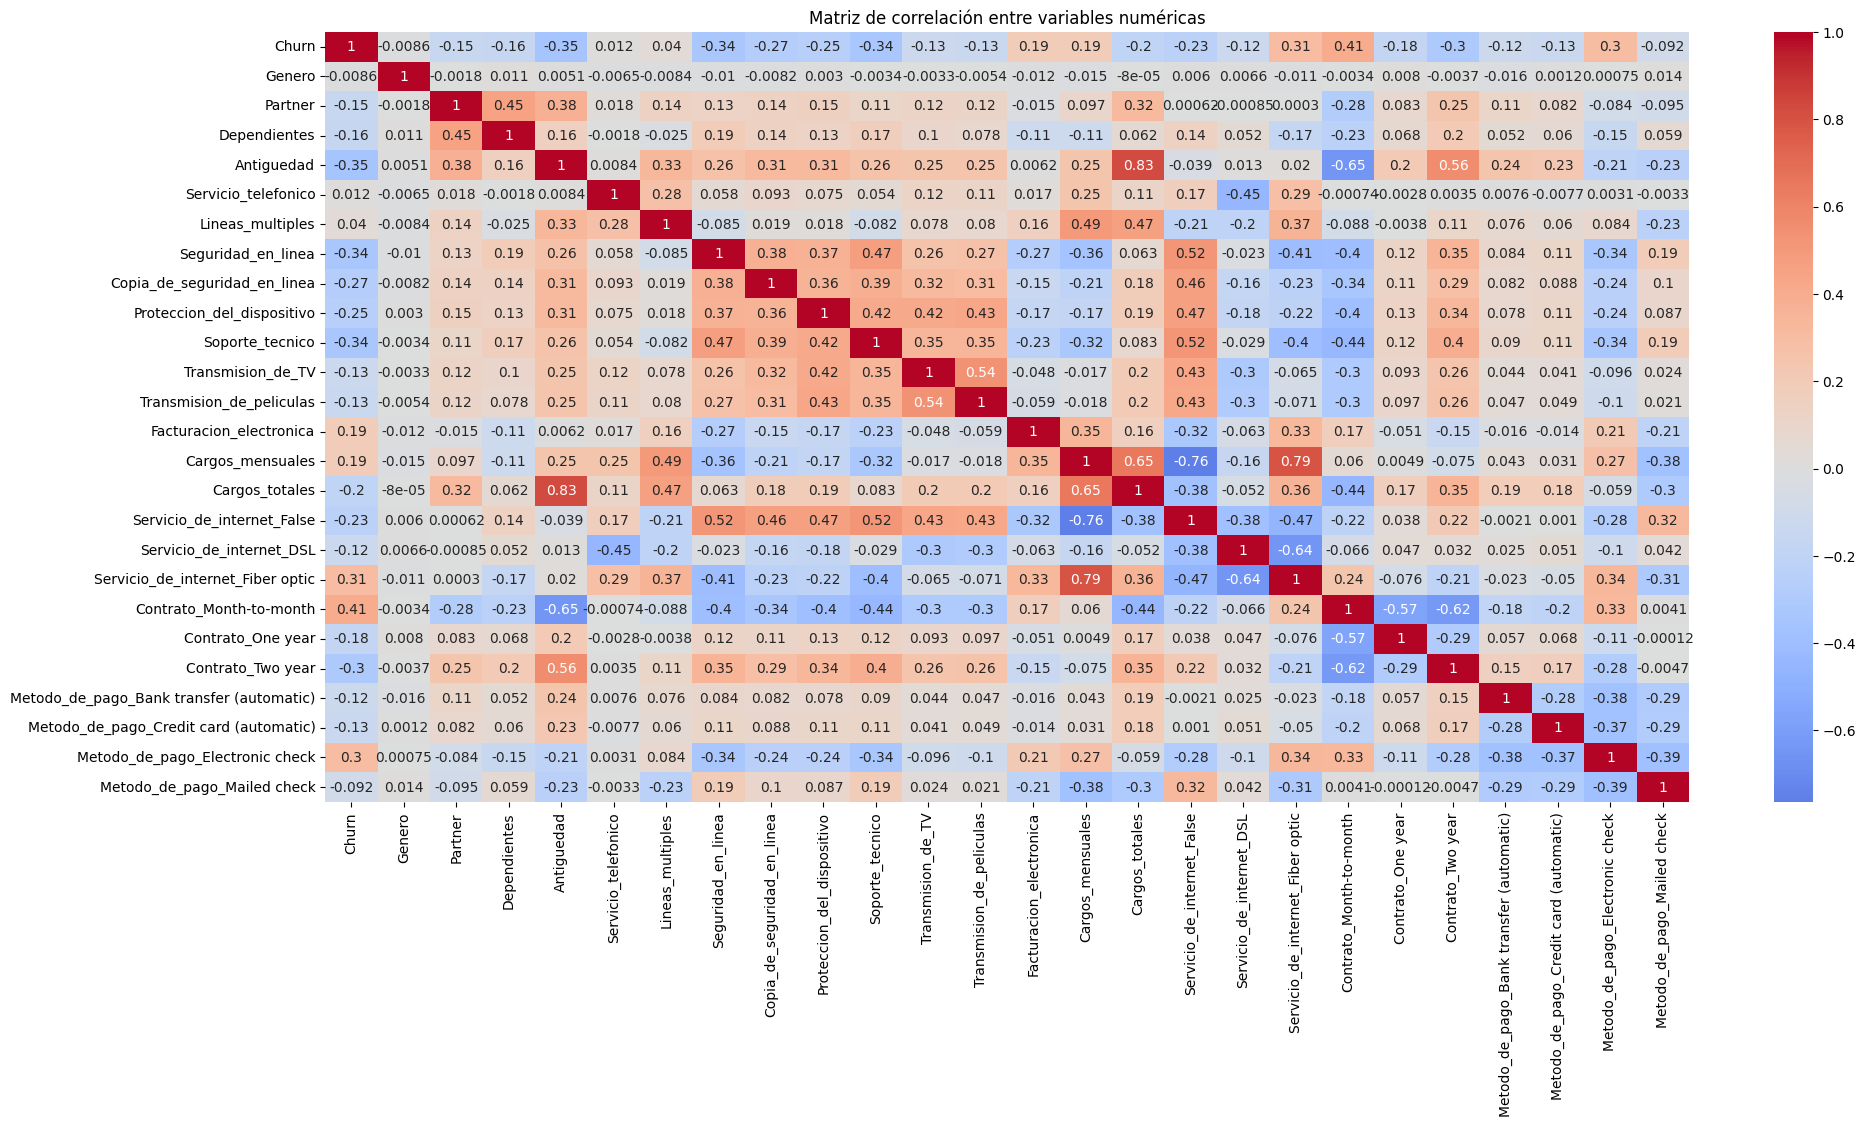

In [116]:
corr = datos_encoding.corr(numeric_only=True)

plt.figure(figsize=(22, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## **Tiempo de contrato × Cancelación**

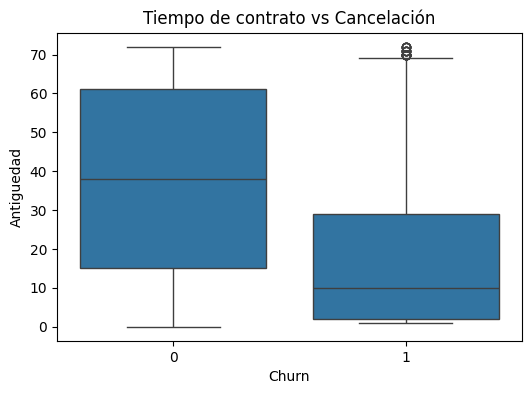

In [117]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="Antiguedad", data=datos_encoding)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

## **Gasto total × Cancelación**

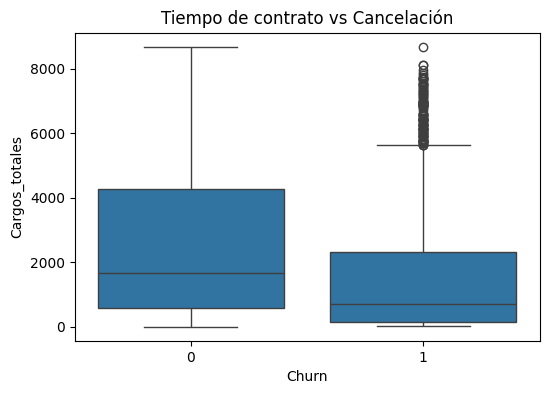

In [118]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="Cargos_totales", data=datos_encoding)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

Distribución después de SMOTE:
 Churn
0    3622
1    3622
Name: count, dtype: int64


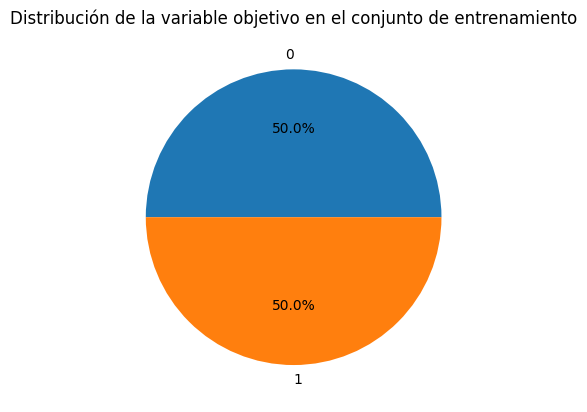

In [119]:
X = datos_encoding.drop("Churn", axis=1)
y = datos_encoding["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:\n", y_train_bal.value_counts())

plt.pie(y_train_bal.value_counts(), labels=y_train_bal.value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de la variable objetivo en el conjunto de entrenamiento')
plt.show()



              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



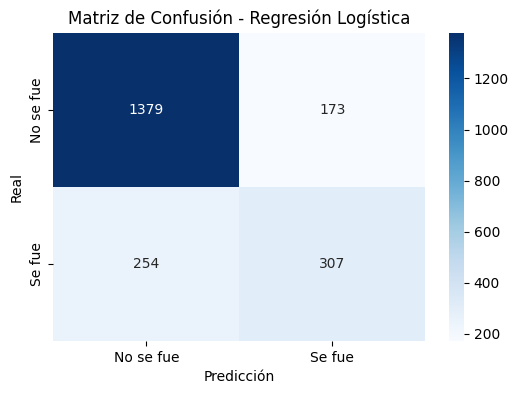

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


In [121]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Árbol de Decisión")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Árbol de Decisión
[[1252  300]
 [ 272  289]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



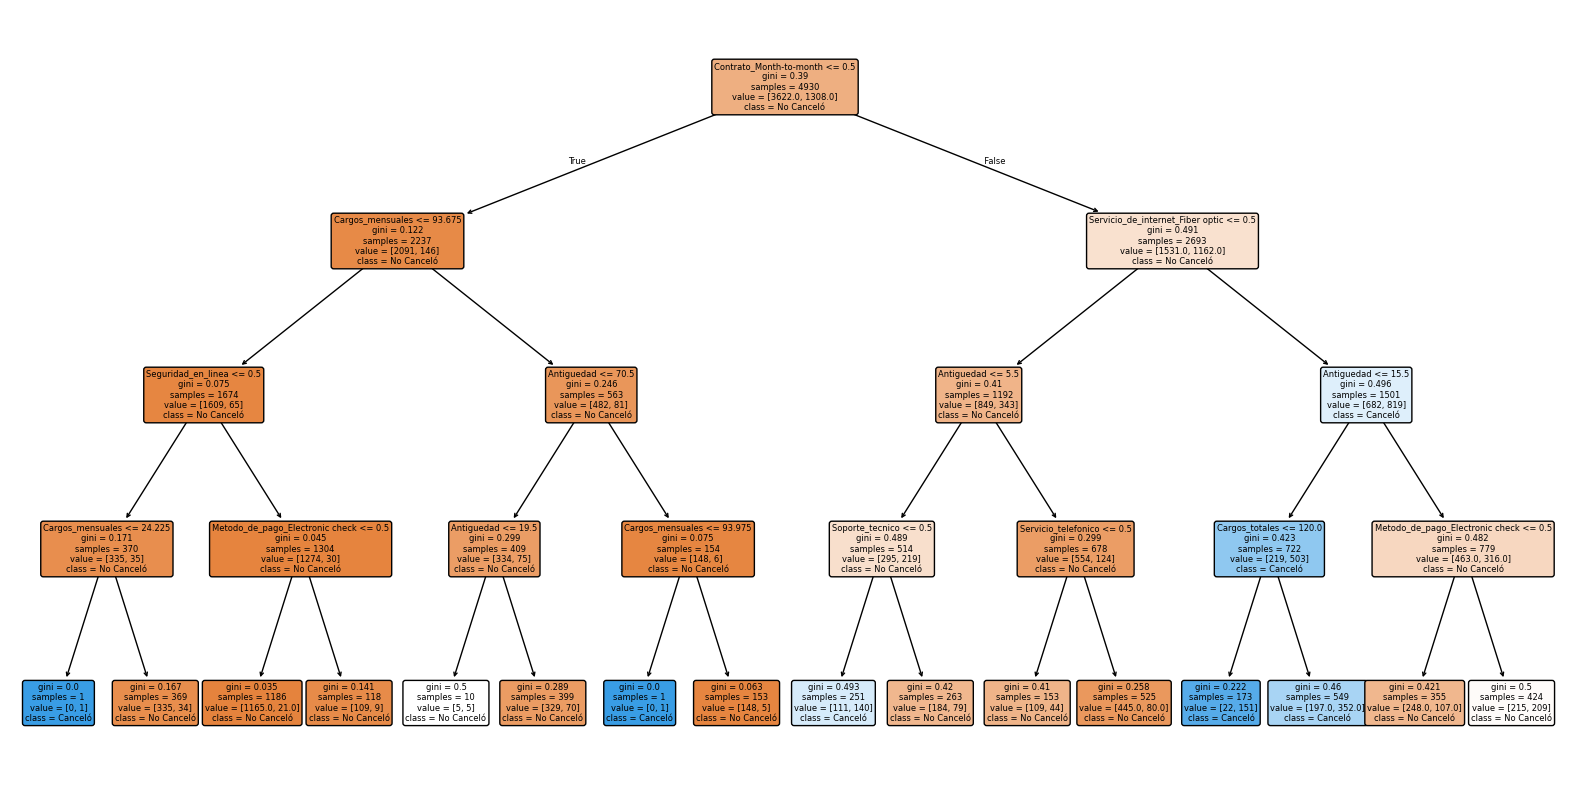

In [122]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['No Canceló','Canceló'],
    filled=True,
    rounded=True,
    fontsize=6
)
plt.show()


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_bal)

X_test_scaled = scaler.transform(X_test)
y_pred_lr = log_reg.predict(X_test_scaled)

In [125]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_bal)

coef = log_reg.coef_[0]

coeficientes_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coef,
    'Importancia_Abs': np.abs(coef)
}).sort_values(by='Importancia_Abs', ascending=False)

print("Coeficientes de Regresión Logística (ordenados por importancia absoluta):")
print(coeficientes_df)

Coeficientes de Regresión Logística (ordenados por importancia absoluta):
                                    Variable  Coeficiente  Importancia_Abs
3                                 Antiguedad    -1.332715         1.332715
14                            Cargos_totales     0.635085         0.635085
17          Servicio_de_internet_Fiber optic     0.412437         0.412437
15                Servicio_de_internet_False    -0.400297         0.400297
13                          Cargos_mensuales    -0.323960         0.323960
20                         Contrato_Two year    -0.283374         0.283374
18                   Contrato_Month-to-month     0.265081         0.265081
12                   Facturacion_electronica     0.209678         0.209678
9                            Soporte_tecnico    -0.188656         0.188656
6                         Seguridad_en_linea    -0.164491         0.164491
11                  Transmision_de_peliculas     0.154641         0.154641
16                  Servic

## **Análisis y resumen de datos obtenidos**

El análisis de los coeficientes del modelo de Regresión Logística nos permite entender de forma cuantitativa la relación entre cada variable y la probabilidad de que un cliente cancele su servicio. Los coeficientes actúan como indicadores del peso que cada característica tiene en la predicción del abandono, permitiendo identificar los factores más críticos para la retención de clientes:

- **Antigüedad**: Con un coeficiente negativo de -1.33, la antigüedad es la variable más influyente y el principal factor protector. Esto demuestra que los clientes más antiguos tienen una probabilidad significativamente menor de cancelar su servicio, lo que subraya la importancia de la fidelización a largo plazo.

- **Cargos Totales**: El coeficiente positivo de +0.63 indica que el gasto acumulado por el cliente aumenta el riesgo de cancelación. Este hallazgo, aunque contraintuitivo, sugiere que los clientes con un alto gasto tienen expectativas más elevadas y son más propensos a buscar alternativas si no perciben un valor adecuado.

- **Tipo de Contrato**: El tipo de contrato se revela como un factor determinante. Los contratos de dos años tienen un coeficiente negativo de -0.28, lo que confirma que son un escudo eficaz contra el abandono. En contraste, el servicio de mes a mes tiene un coeficiente positivo, lo que incrementa el riesgo de cancelación.

- **Servicios de Internet**: El servicio de fibra óptica tiene un coeficiente positivo de +0.41, asociándose con un mayor riesgo de churn. En contraste, los servicios de soporte técnico y seguridad en línea, con coeficientes de -0.18 y -0.16 respectivamente, actúan como factores protectores que reducen la probabilidad de que un cliente se vaya.

## **Conclusión**

El análisis confirma que la antigüedad del cliente y la duración del contrato son los pilares fundamentales para la fidelización. Sin embargo, también nos alerta sobre la necesidad de un enfoque proactivo en clientes de alto gasto y aquellos con servicios premium como fibra óptica, ya que representan un segmento de alto riesgo.

Por lo tanto, la estrategia de retención debe enfocarse en:

- **Fortalecer la Fidelización**: Incentivar la renovación de contratos a largo plazo mediante programas de lealtad, descuentos o beneficios exclusivos para premiar la antigüedad del cliente.

- **Gestión de Clientes de Alto Valor**: Implementar un seguimiento personalizado para los clientes de alto gasto y aquellos que contratan servicios premium. Esto implica ofrecer un soporte excepcional y soluciones proactivas antes de que surja la insatisfacción.

- **Comunicación de Valor**: Resaltar y comunicar de manera clara los beneficios de los servicios de soporte técnico y seguridad. Estos no deben ser vistos como un complemento, sino como una característica clave que justifica el valor del servicio y fortalece la confianza del cliente, actuando como un factor decisivo en la retención a largo plazo.